# Assignment 2

12111345 颜灵敏

## Preparations: Data Import and Fundamental Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import file as pd dataframe
df_offers = pd.read_csv("./datasets/data_offers.csv")
df_orders = pd.read_csv("./datasets/data_orders.csv")

In [3]:
# print data shape
print(df_offers.shape)
print(df_orders.shape)

(334363, 2)
(10716, 8)


In [4]:
len(df_orders["order_gk"].unique())

10716

In [5]:
# print data column names
print("df_offers:")
print(df_offers.columns)
print("df_oroders:")
print(df_orders.columns)

df_offers:
Index(['order_gk', 'offer_id'], dtype='object')
df_oroders:
Index(['order_datetime', 'origin_longitude', 'origin_latitude', 'm_order_eta',
       'order_gk', 'order_status_key', 'is_driver_assigned_key',
       'cancellations_time_in_seconds'],
      dtype='object')


In [6]:
# print top five records of data
df_orders.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [7]:
# print top five records of data
df_offers.head(5)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [8]:
# Extract `hour` in `order_datetime` 
df_orders["order_datetime_hour"] = pd.to_datetime(df_orders["order_datetime"]).dt.hour

## Question 1: Build up distribution of orders according to reasons for failure

In [9]:
# Calculate the number of cancelled orders by order status
df_orders["cnt"] = 1
df1 = df_orders.groupby("order_status_key")["cnt"].sum().reset_index()
df1["percentage"] = df1["cnt"]/sum(df1["cnt"]) * 100
df1

,order_status_key,cnt,percentage
0,4,7307,68.187757
1,9,3409,31.812243


In [10]:
# replace the number to meaningful string
df1["order_status_key"] = df1["order_status_key"].replace(4,"client")
df1["order_status_key"] = df1["order_status_key"].replace(9,"system")

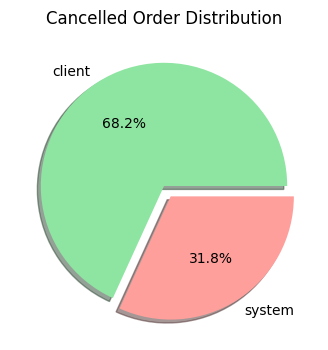

In [11]:
# draw a pie plot
plt.figure(figsize=(4, 4))
explode = (0, 0.1)
plt.pie(df1["cnt"], labels=df1["order_status_key"], autopct='%1.1f%%', colors = sns.color_palette('pastel')[2:4],shadow=True,explode=explode)
plt.title('Cancelled Order Distribution')
plt.savefig("fig1.png")
plt.show()

The pie plot shows that more than half of the orders are canceled by clients, while the number of orders automatically canceled by the system is less than half of the orders canceled by clients.

In [12]:
# calculate number of cancelled orders by whether drivers are assigned
df2 = df_orders.groupby("is_driver_assigned_key")["cnt"].sum().reset_index()
df2["percentage"] = df2["cnt"]/sum(df2["cnt"]) * 100
df2

,is_driver_assigned_key,cnt,percentage
0,0,7902,73.740202
1,1,2814,26.259798


In [13]:
# replace the number to meaningful string
df2["is_driver_assigned_key"] = df2["is_driver_assigned_key"].replace(0,"no")
df2["is_driver_assigned_key"] = df2["is_driver_assigned_key"].replace(1,"yes")

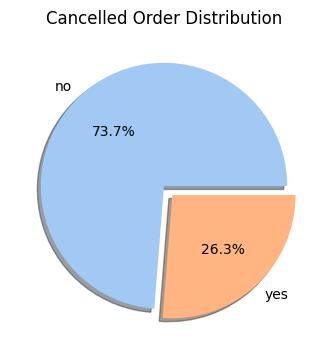

In [14]:
plt.figure(figsize=(4, 4))
explode = (0, 0.1)
plt.pie(df2["cnt"], labels=df2["is_driver_assigned_key"], autopct='%1.1f%%', colors =sns.color_palette('pastel'),shadow=True,explode=explode)
plt.title('Cancelled Order Distribution')
plt.savefig("fig2.png")
plt.show()

The pie chart above indicates that the number of order cancellations due to unassigned drivers is significantly higher than the number of cancellations after drivers have been assigned.

In [15]:
# Classifying orders based on whether they are assigned, calculate proportion of cancellations by clients and system.
df3 = df_orders.groupby(["is_driver_assigned_key","order_status_key"])["cnt"].sum().reset_index()
df3["percentage"] = df3["cnt"]/sum(df3["cnt"]) * 100

df3["is_driver_assigned_key"] = df3["is_driver_assigned_key"].replace(0,"not assign a driver")
df3["is_driver_assigned_key"] = df3["is_driver_assigned_key"].replace(1,"assign a driver")

df3["order_status_key"] = df3["order_status_key"].replace(4,"client")
df3["order_status_key"] = df3["order_status_key"].replace(9,"system")

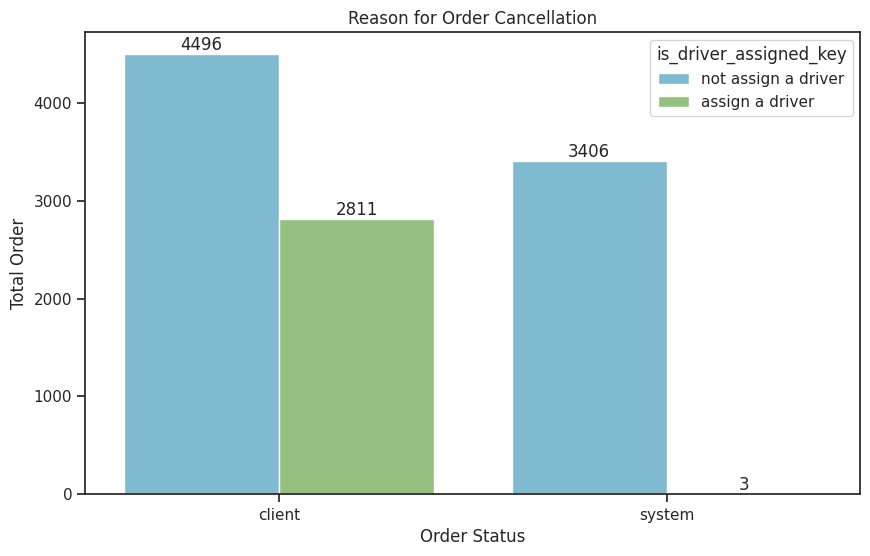

In [16]:
## Visualize the chart
sns.set_theme(style='ticks', palette=['#73c0de', '#91cc75'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=df3, y='cnt', x='order_status_key', hue='is_driver_assigned_key')

ax.set(title='Reason for Order Cancellation', xlabel='Order Status', ylabel='Total Order')

for i in ax.containers:
     ax.bar_label(i)

plt.savefig("fig3.png")
plt.show()


It is evident that the majority of cancellations by both clients and the system occur because drivers have not been assigned by the system. Conversely, when drivers have been assigned, the number of cancellations initiated by the system is very low.

## Question 2: Plot the distribution of failed orders by hours and give explanations

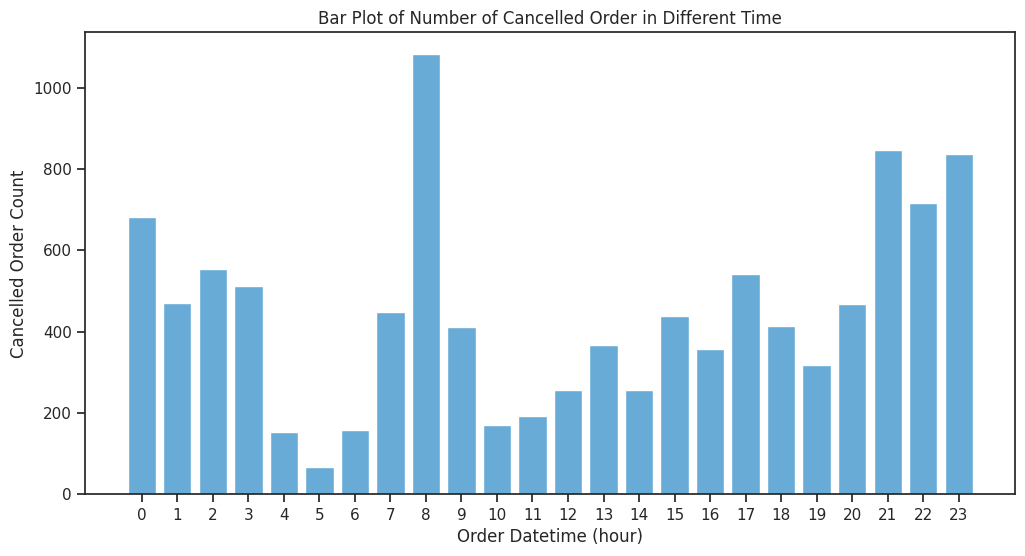

In [17]:
# According to the time, calculate the total number of cancelled orders
df_hour = df_orders.groupby("order_datetime_hour")["cnt"].sum().reset_index()

#display the barplot
plt.figure(figsize=(12,6))
plt.bar(df_hour["order_datetime_hour"],df_hour["cnt"],color='#67abd6')
plt.xticks(df_hour["order_datetime_hour"])
plt.xlabel('Order Datetime (hour)')
plt.ylabel('Cancelled Order Count')
plt.title('Bar Plot of Number of Cancelled Order in Different Time')
plt.savefig("fig4.png")
plt.show()

- The volume of order cancellations shows a decreasing trend from 0 to 5 a.m. After 5 a.m., it begins to increase, reaching its peak at 8 a.m. Subsequently, it rapidly declines again, and from 10 a.m. onwards, there is an overall upward trend in cancellations, persisting until 11 p.m.
- The peak in order cancellations at 8 a.m. could indeed be attributed to the high demand for transportation as people head to work, resulting in a surge in ride-hailing requests. If there aren't enough drivers available to meet this demand, some customers may experience delays or be unable to secure a ride promptly, leading to an increase in canceled orders.

In [18]:
# # Filter orders with system and client cancellation
system_cancel = df_orders[df_orders["order_status_key"] == 9]
client_cancel = df_orders[df_orders["order_status_key"] == 4]

# Group system cancellations by hour and sum the count
system_hour = system_cancel.groupby("order_datetime_hour")["cnt"].sum().reset_index()
system_hour = system_hour.rename(columns={'cnt': 'system reject'})

# Group client cancellations by hour and sum the count
client_hour = client_cancel.groupby("order_datetime_hour")["cnt"].sum().reset_index()
client_hour = client_hour.rename(columns={'cnt': 'client cancel'})

# Merge system and client cancellation dataframes based on hour
sys_cli_temp = pd.merge(system_hour, client_hour, on="order_datetime_hour")

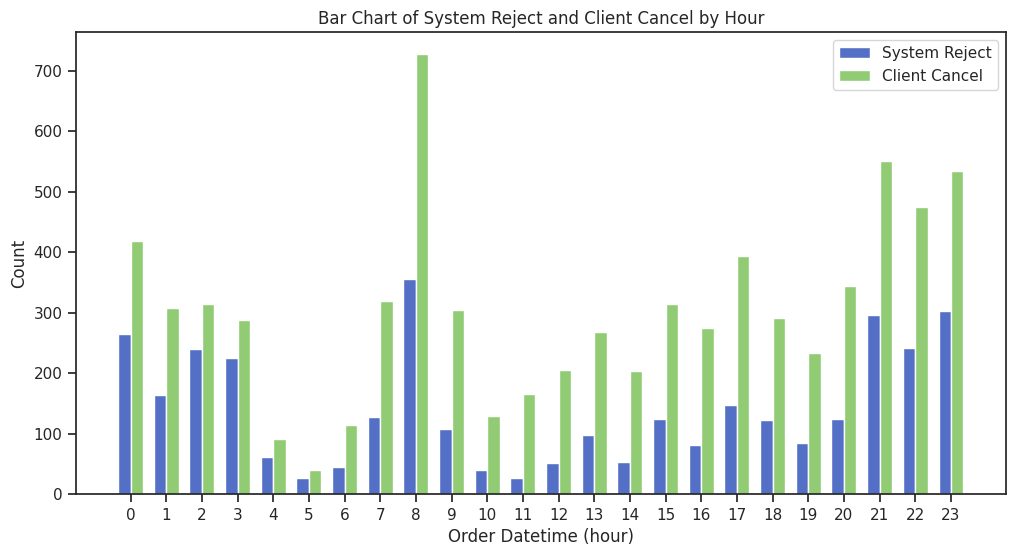

In [19]:
# Set the width to 12 and height to 6
plt.figure(figsize=(12, 6))

# Set the positions
x = sys_cli_temp['order_datetime_hour']

# Set the width of the bars
width = 0.35

# Draw the bar chart
plt.bar(x - width/2, sys_cli_temp['system reject'], width, label='System Reject',color="#5470c6")
plt.bar(x + width/2, sys_cli_temp['client cancel'], width, label='Client Cancel',color="#91cc75")

# Add labels and title
plt.xlabel('Order Datetime (hour)')
plt.ylabel('Count')
plt.title('Bar Chart of System Reject and Client Cancel by Hour')
plt.xticks(x)
plt.legend()
plt.savefig("fig5.png")
# Display the plot
plt.show()

- Regardless of the time period, the number of order cancellations by clients is significantly higher than those canceled by the system. Additionally, during the time intervals of 4 a.m. to 7 a.m. and 10 to 8 p.m., there are relatively fewer orders automatically canceled by the system. The time periods with fewer cancellations by clients are primarily concentrated between 4 a.m. and 6 a.m.
- The situation described could be attributed to the higher availability of taxi drivers during regular daytime working hours, while there tends to be fewer taxi drivers available during late-night and early morning hours.

In [20]:
# Filter orders whether driver is assigned or not
is_assigned = df_orders[df_orders["is_driver_assigned_key"]==1]
no_assigned = df_orders[df_orders["is_driver_assigned_key"]==0]

# Group orders by hour and sum the count of orders
is_assigned_hour = is_assigned.groupby("order_datetime_hour")["cnt"].sum().reset_index()
no_assigned_hour = no_assigned.groupby("order_datetime_hour")["cnt"].sum().reset_index()

# Rename the count column to 'is assigned'
is_assigned_hour = is_assigned_hour.rename(columns={'cnt':'is assigned'})
no_assigned_hour = no_assigned_hour.rename(columns={'cnt':'no assigned'})

# Merge the dataframes on 'order_datetime_hour' column
is_assigned_temp = pd.merge(is_assigned_hour, no_assigned_hour, on="order_datetime_hour")

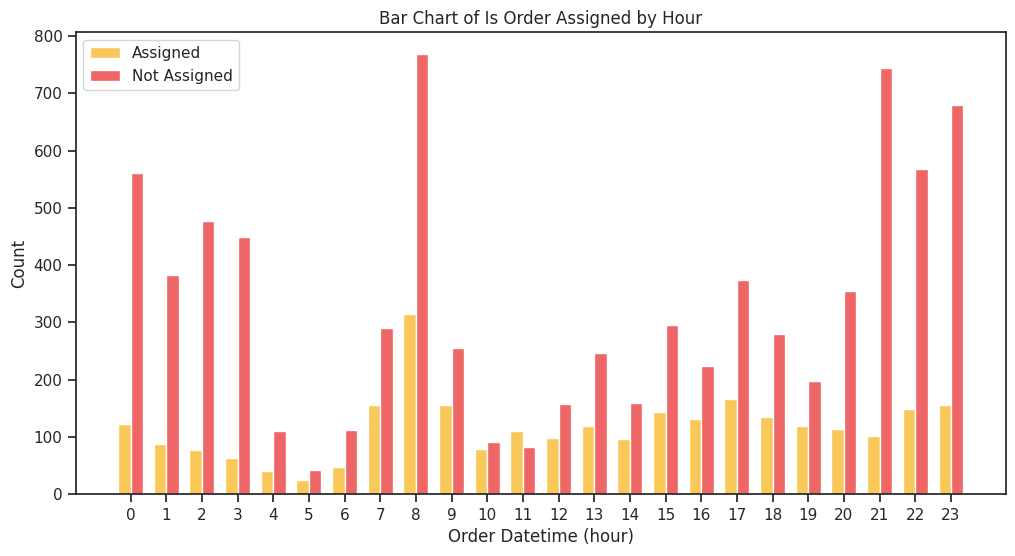

In [21]:
# draw a barplot
plt.figure(figsize=(12, 6)) 
x = is_assigned_temp['order_datetime_hour']

width = 0.35

plt.bar(x - width/2, is_assigned_temp['is assigned'], width, label='Assigned',color="#fac858")
plt.bar(x + width/2, is_assigned_temp['no assigned'], width, label='Not Assigned',color="#ee6666")

plt.xlabel('Order Datetime (hour)')
plt.ylabel('Count')
plt.title('Bar Chart of Is Order Assigned by Hour')
plt.xticks(x)
plt.legend()
plt.savefig("fig6.png")
plt.show()

Regardless of the time period, the main reason for order cancellations is the lack of assigned drivers, while the proportion of cancellations by assigned drivers remains minimal. This is especially notable during the time periods previously mentioned with higher cancellation rates, where the proportion of orders without assigned drivers is significantly elevated.

## Question 3: Plot the average time to cancellation with and without driver, by the hour

### According to the IQR of `cancellations_time_in_seconds`, remove outliers. 

In [22]:
# Calculate the first quartile (Q1)
Q1 = df_orders["cancellations_time_in_seconds"].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df_orders["cancellations_time_in_seconds"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the threshold range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the data
df_no_outliers = df_orders[(df_orders["cancellations_time_in_seconds"] >= lower_bound) & (df_orders["cancellations_time_in_seconds"] <= upper_bound)]


In [23]:
# classify the data to with driver & without driver
is_assigned_no_outliers = df_no_outliers[df_no_outliers["is_driver_assigned_key"]==1]
no_assigned_no_outliers = df_no_outliers[df_no_outliers["is_driver_assigned_key"]==0]

#calculate mean of cancellations time in different hours
mean_is_hour = is_assigned_no_outliers.groupby("order_datetime_hour")["cancellations_time_in_seconds"].mean().reset_index()
mean_no_hour = no_assigned_no_outliers.groupby("order_datetime_hour")["cancellations_time_in_seconds"].mean().reset_index()

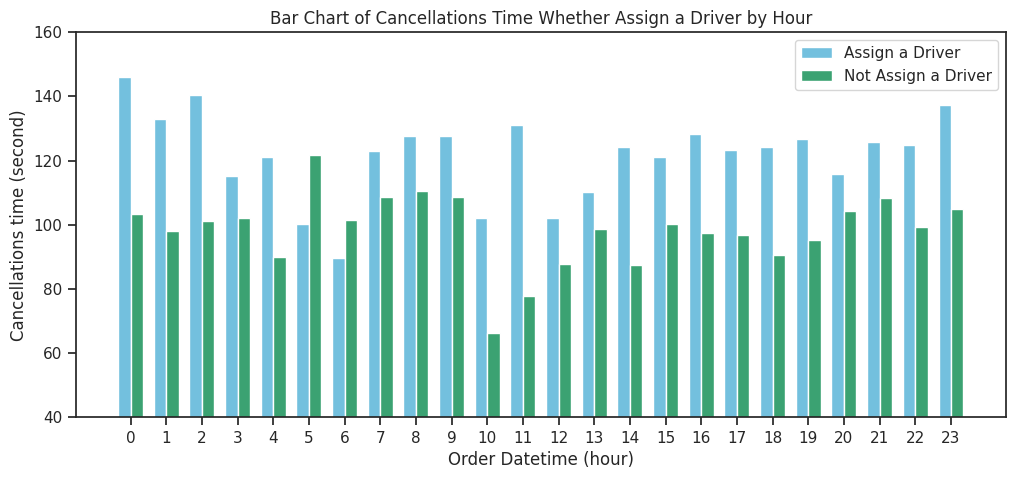

In [24]:
# draw a barplot
plt.figure(figsize=(12, 5)) 
x = mean_is_hour['order_datetime_hour']

width = 0.35

plt.bar(x - width/2, mean_is_hour['cancellations_time_in_seconds'], width, label='Assign a Driver',color="#73c0de")
plt.bar(x + width/2, mean_no_hour['cancellations_time_in_seconds'], width, label='Not Assign a Driver',color="#3ba272")

plt.xlabel('Order Datetime (hour)')
plt.ylabel('Cancellations time (second)')
plt.ylim(40,160)
plt.title('Bar Chart of Cancellations Time Whether Assign a Driver by Hour')
plt.xticks(x)
plt.legend()
plt.savefig("fig7.png")
plt.show()

**Conclusions:**
- Except for 5 a.m. and 6 a.m., the average waiting time before canceling an order is significantly shorter when the system hasn't assigned a driver compared to when a driver has been assigned.
- Looking at the scenario where drivers are assigned, the shortest average waiting time before canceling an order is at 6 a.m. However, throughout the day, the average waiting time for each time period generally remains between 100s to 130s.
- In the case where drivers are not assigned, the shortest average waiting time before canceling an order is at 10 a.m., with only about 70s, while for most other time periods, it ranges between 80s to 110s.

## Question 4: Plot the distribution of average ETA by hours.

In [25]:
# Calculate whether ETA is counted after assigning orders
df_orders.groupby("is_driver_assigned_key")["m_order_eta"].count()

is_driver_assigned_key
0       0
1    2814
Name: m_order_eta, dtype: int64

In [26]:
# group `m_order_eta` by `order_fatetime_hour`
eta_hour = df_orders[["m_order_eta","order_datetime_hour"]].groupby("order_datetime_hour").mean().reset_index()

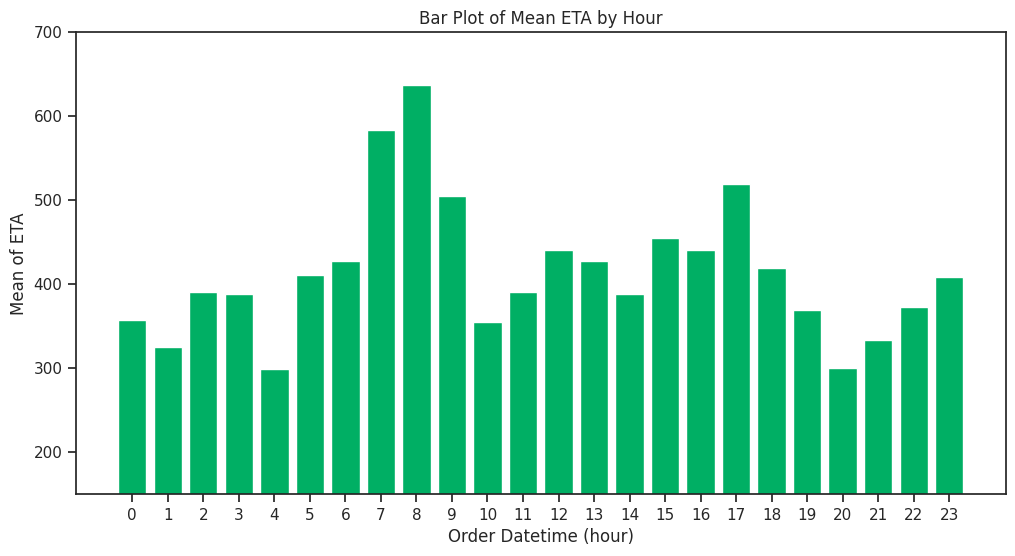

In [27]:
# draw a barplot
plt.figure(figsize=(12,6))
plt.bar(eta_hour["order_datetime_hour"],eta_hour["m_order_eta"],color='#00af64')
plt.xlabel('Order Datetime (hour)')
plt.xticks(eta_hour["order_datetime_hour"])
plt.ylabel('Mean of ETA')
plt.ylim(150,700)
plt.title("Bar Plot of Mean ETA by Hour")
plt.savefig("fig8.png")
plt.show()

Taking into account the impact of commute due to the work, except for the morning rush hours from 7 a.m. to 9 a.m. and the evening rush hours after 5 p.m., where the waiting time for clients is longer, exceeding 500 seconds, the waiting time for most other time intervals generally remains around 400 seconds or less.

## Question 5: Hexagons

In [28]:
import folium
import h3

In [30]:
# Calculate the number of size 8 hexes containing 80% of all orders
def calculate_hexes_for_80_percent(df):
     # Calculate the total number of orders
    total_orders = len(df)
    
    # Convert orders to H3 hexagons based on location (latitude and longitude)
    df["h3_hex"] = df.apply(lambda row: h3.geo_to_h3(row["origin_latitude"], row["origin_longitude"], 8), axis=1)
    
    # Calculate the number of orders in each hexagon
    hex_counts = df["h3_hex"].value_counts().reset_index()
    hex_counts.columns = ["h3_hex", "order_count"]
    
    # Sort hexagons by order count
    hex_counts = hex_counts.sort_values(by="order_count", ascending=False)
    
    # Accumulate order counts until reaching 80% of total orders
    cumulative_orders = 0
    for i, row in hex_counts.iterrows():
        cumulative_orders += row["order_count"]
        if cumulative_orders >= total_orders * 0.8:
            break
    
    # Return the number of hexagons containing 80% of orders
    return len(hex_counts[:i+1])

# Calculate the number of size 8 hexes containing 80% of all orders
num_hexes_for_80_percent = calculate_hexes_for_80_percent(df_orders)

# Visualize hexagons and color them based on fail count
def visualize_hexes(df, hex_resolution):
    # Create a map
    m = folium.Map(location=[df["origin_latitude"].mean(), df["origin_longitude"].mean()], zoom_start=10)

    # Plot hexagons
    for hex_id in df["h3_hex"].unique():
        # Calculate the fail count for each hexagon
        hex_fail_count = df[df["h3_hex"] == hex_id]["cnt"].sum()
        
        # Get the centroid coordinates of the hexagon
        lat, lng = h3.h3_to_geo(hex_id)
        
        # Create color for the hexagon based on fail count
        color = "red" if hex_fail_count > 0 else "green"
        
        # Add hexagon to the map
        folium.RegularPolygonMarker(location=[lat, lng], fill_color=color, number_of_sides=6, radius=10).add_to(m)

    return m

# Visualize hexagons and display on map
map_with_hexes = visualize_hexes(df_orders, 8)
# need use VPN to see the map
map_with_hexes
map_with_hexes.save("hexes_visualization.html")
